                                            Effects on the US Misery Index:
For this project I am hoping to answer the question :Does the S&P or the median House Price have an effect on the Misery Index ?
In order to answer this question, I am planning on using metrics from three datasets (all metrics reported monthly) from quandl. The datasets that I am using are the Zillow, Yale, and US Misery. 

So far, I found that the correlation between the Median House Price and the US Misery Index is approximately -.80 and the correlation between the S&P and the US Misery Index is approximately -.84. This is to say that both the median house price and S&P are negatively correlated with the US Misery Index. I Also learned that the max average for the median house price, unemployment, and S&P composite was in 2019. Additionally, the year of the max average misery index and inflation was in 2011 
while the max average unemployment rate was in 2010. I also see an inverse pattern between the max yearly average for the features median list price, us misery index, and s&p (the max yearly average S&P and median list price occur in 2019 while the max yearly average for the misery index occurs in 2011).

I always had a interest in topics related to housing, stocks, and the economy.Additionally, I never knew what the misery index was until I found a dataset in regards to it in Quandl. 

In [2]:
import scipy.stats as stats
import numpy as np

%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
import quandl
import pandas as pd


quandl.ApiConfig.api_key = 'TQnvQmTWu3_mxisgXmye'
medianlistprice=quandl.get('ZILLOW/M1_MLPAH', start_date='2010-12-31', end_date='2019-12-31') 
medianpricecut=quandl.get('ZILLOW/M1_MPCDAH', start_date='2010-12-31', end_date='2019-12-31') 
percentpricecut=quandl.get('ZILLOW/M1_PLPRAH', start_date='2010-12-31', end_date='2019-12-31') 



In [4]:

medianlistprice_df=pd.DataFrame(medianlistprice)
medianpricecut_df=pd.DataFrame(medianpricecut)
percentpricecut_df=pd.DataFrame(percentpricecut)


In [5]:

medianlistprice_df["medianlistprice"]=medianlistprice_df.values
medianpricecut_df["medianpricecut"]=medianpricecut_df.values
percentpricecut_df["percentpricecut"]=percentpricecut_df.values


In [6]:

del medianlistprice_df["Value"]
del medianpricecut_df["Value"]
del percentpricecut_df["Value"]


In [7]:
MasterConcatFinal["Month_Year"]=pd.to_datetime(MasterConcatFinal.index.values,format="%m-%d-%y")
PriceConcat=pd.concat([medianlistprice_df,medianpricecut_df],axis=1,join="inner")
PriceConcatFinal=pd.concat([PriceConcat,percentpricecut_df],axis=1,join="inner")

In [8]:
#a healthy misery index is between 6 and 7 percent.
quandl.ApiConfig.api_key = 'TQnvQmTWu3_mxisgXmye'
Misery=quandl.get('USMISERY/INDEX', start_date='2010-12-31', end_date='2019-12-31')

In [9]:
Misery_df=pd.DataFrame(Misery)

In [10]:
MasterConcat=pd.concat([PriceConcatFinal,Misery_df],axis=1,join="inner")

In [11]:
quandl.ApiConfig.api_key = 'TQnvQmTWu3_mxisgXmye'
SPCOMP=quandl.get('YALE/SPCOMP', start_date='2010-12-31', end_date='2019-12-31')

In [12]:
SPCOMP_df=pd.DataFrame(SPCOMP)
SPCOMP_df_new = SPCOMP_df.rename(index={'Year': 'Date'})

In [13]:
MasterConcat=pd.concat([PriceConcatFinal,SPCOMP_df_new],axis=1,join="inner")

In [14]:
MasterConcatFinal=pd.concat([MasterConcat,Misery_df],axis=1,join="inner")

In [15]:
print(MasterConcatFinal)

            medianlistprice  medianpricecut  percentpricecut  S&P Composite  \
2010-09-30         199000.0         10000.0        15.060669    1122.080000   
2010-10-31         197000.0         10000.0        14.450634    1171.580000   
2010-11-30         194900.0         10000.0        11.978632    1198.890000   
2010-12-31         189500.0         10000.0        10.622925    1241.530000   
2011-01-31         185000.0         10000.0        13.187245    1282.620000   
2011-02-28         184900.0         10000.0        11.489166    1321.120000   
2011-03-31         187900.0         10000.0        13.894619    1304.490000   
2011-04-30         187500.0          9900.0        13.834944    1331.510000   
2011-05-31         189900.0          9999.0        13.964655    1338.310000   
2011-06-30         189900.0         10000.0        15.188460    1287.290000   
2011-07-31         189900.0         10000.0        14.865479    1325.190000   
2011-08-31         189900.0          9900.0        1

In [ ]:
MasterConcatFinal["Month"]=MasterConcatFinal["Month_Year"].dt.month
MasterConcatFinal["Year"]=MasterConcatFinal["Month_Year"].dt.year

The variation in the misery index is 2.275636
The variation in unemployment is 1.914615
The variation in Inflation is 0.888068
The variation in the S&P composite is 556.042077
The variation in the median list price is 35265.747134


The Max,Min average and Month of the Max,Min average in the misery index is Month
6    8.03375
Name: Misery Index, dtype: float64,Month
8    7.658889
Name: Misery Index, dtype: float64 

The Max,Min average and Month of the Max,Min average in unemployment is Month
6    6.2
Name: Unemployment Rate, dtype: float64,Month
8    5.844444
Name: Unemployment Rate, dtype: float64

The Max,Min average and Month of the Max,Min average in Inflation is Month
7    1.835
Name: Inflation Rate, dtype: float64,Month
1    1.681111
Name: Inflation Rate, dtype: float64

The Max,Min average and Month of the Max,Min average in the S&P composite is Month
8    2071.415354
Name: S&P Composite, dtype: float64,Month
6    1943.51875
Name: S&P Composite, dtype: float64

The Max,Min aver

,Unemployment Rate,Inflation Rate,Misery Index,medianlistprice,S&P Composite
Unemployment Rate,1.000000,0.212933,0.924451,-0.936918,-0.958801
Inflation Rate,0.212933,1.000000,0.569402,-0.041140,-0.082766
Misery Index,0.924451,0.569402,1.000000,-0.804335,-0.838991
medianlistprice,-0.936918,-0.041140,-0.804335,1.000000,0.966146
S&P Composite,-0.958801,-0.082766,-0.838991,0.966146,1.000000


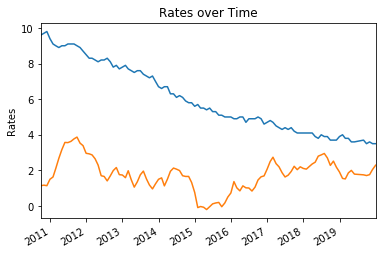

In [75]:

pricegrp=MasterConcatFinal["medianlistprice"]
miserygrp=MasterConcatFinal["Misery Index"]
unemploygrp=MasterConcatFinal["Unemployment Rate"]
Inflgrp=MasterConcatFinal["Inflation Rate"]

#miserygrp.plot(title="Misery Index over time") 
#sns.mpl.pyplot.ylabel("Misery Index") 

unemploygrp.plot(title="Rates over Time")
Inflgrp.plot()
#miserygrp.plot()
sns.mpl.pyplot.ylabel("Rates") 

Unemploystd=MasterConcatFinal["Unemployment Rate"].std()
Inflstd=MasterConcatFinal["Inflation Rate"].std()
Miserystd=MasterConcatFinal["Misery Index"].std()
SPstd=MasterConcatFinal["S&P Composite"].std()
medianlistpricestd=MasterConcatFinal["medianlistprice"].std()

Unemploymean=MasterConcatFinal.groupby("Month")["Unemployment Rate"].mean()
Inflstdmean=MasterConcatFinal.groupby("Month")["Inflation Rate"].mean()
Miserymean=MasterConcatFinal.groupby("Month")["Misery Index"].mean()
SPmean=MasterConcatFinal.groupby("Month")["S&P Composite"].mean()
medianlistpricemean=MasterConcatFinal.groupby("Month")["medianlistprice"].mean()


Unemploymeanyr=MasterConcatFinal.groupby("Year")["Unemployment Rate"].mean()
Inflstdmeanyr=MasterConcatFinal.groupby("Year")["Inflation Rate"].mean()
Miserymeanyr=MasterConcatFinal.groupby("Year")["Misery Index"].mean()
SPmeanyr=MasterConcatFinal.groupby("Year")["S&P Composite"].mean()
medianlistpricemeanyr=MasterConcatFinal.groupby("Year")["medianlistprice"].mean()


MaxUnemploymean=Unemploymean[Unemploymean==Unemploymean.max()]
MinUnemploymean=Unemploymean[Unemploymean==Unemploymean.min()]
MaxUnemploymeanyr=Unemploymeanyr[Unemploymeanyr==Unemploymeanyr.max()]
MinUnemploymeanyr=Unemploymeanyr[Unemploymeanyr==Unemploymeanyr.min()]

MaxInflstdmean=Inflstdmean[Inflstdmean==Inflstdmean.max()]
MinInflstdmean=Inflstdmean[Inflstdmean==Inflstdmean.min()]
MaxInflstdmeanyr=Inflstdmeanyr[Inflstdmeanyr==Inflstdmeanyr.max()]
MinInflstdmeanyr=Inflstdmeanyr[Inflstdmeanyr==Inflstdmeanyr.min()]

MaxMiserymean=Miserymean[Miserymean==Miserymean.max()]
MinMiserymean=Miserymean[Miserymean==Miserymean.min()]
MaxMiserymeanyr=Miserymeanyr[Miserymeanyr==Miserymeanyr.max()]
MinMiserymeanyr=Miserymeanyr[Miserymeanyr==Miserymeanyr.min()]

MaxSPmean=SPmean[SPmean==SPmean.max()]
MinSPmean=SPmean[SPmean==SPmean.min()]
MaxSPmeanyr=SPmeanyr[SPmeanyr==SPmeanyr.max()]
MinSPmeanyr=SPmeanyr[SPmeanyr==SPmeanyr.min()]

Maxmedianlistpricemean=medianlistpricemean[medianlistpricemean==medianlistpricemean.max()]
Minmedianlistpricemean=medianlistpricemean[medianlistpricemean==medianlistpricemean.min()]
Maxmedianlistpricemeanyr=medianlistpricemeanyr[medianlistpricemeanyr==medianlistpricemeanyr.max()]
Minmedianlistpricemeanyr=medianlistpricemeanyr[medianlistpricemeanyr==medianlistpricemeanyr.min()]

print(f'The variation in the misery index is {Miserystd:f}')
print(f'The variation in unemployment is {Unemploystd:f}')
print(f'The variation in Inflation is {Inflstd:f}')
print(f'The variation in the S&P composite is {SPstd:f}')
print(f'The variation in the median list price is {medianlistpricestd:f}')
print('')
print('')
print(f'The Max,Min average and Month of the Max,Min average in the misery index is {MaxMiserymean},{MinMiserymean} ')
print('')
print(f'The Max,Min average and Month of the Max,Min average in unemployment is {MaxUnemploymean},{MinUnemploymean}')
print('')
print(f'The Max,Min average and Month of the Max,Min average in Inflation is {MaxInflstdmean},{MinInflstdmean}')
print('')
print(f'The Max,Min average and Month of the Max,Min average in the S&P composite is {MaxSPmean},{MinSPmean}')
print('')
print(f'The Max,Min average and Month of the Max,Min average in the median list price is {Maxmedianlistpricemean},{Minmedianlistpricemean}')
print('')
print('')
print(f'The Max,Min average and Year of the Max,Min average in the misery index is {MaxMiserymeanyr},{MinMiserymeanyr} ')
print('')
print(f'The Max,Min average and Year of the Max,Min average in unemployment is {MaxUnemploymeanyr},{MinUnemploymeanyr}')
print('')
print(f'The Max,Min average and Year of the Max,Min average in Inflation is {MaxInflstdmeanyr},{MinInflstdmeanyr}')
print('')
print(f'The Max,Min average and Year of the Max,Min average in the S&P composite is {MaxSPmeanyr},{MinSPmeanyr}')
print('')
print(f'The Max,Min average and Year of the Max,Min average in the median list price is {Maxmedianlistpricemeanyr},{Minmedianlistpricemeanyr}')

scaled_df.corr()

Observations of Corrlations in the dataframe (MasterConcat) that includes housing information from zillow and the misery index. 


In [17]:
MasterConcatFinal.corr()

,medianlistprice,medianpricecut,percentpricecut,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio,Unemployment Rate,Inflation Rate,Misery Index
medianlistprice,1.000000,-0.192684,0.387372,0.966146,0.959623,0.811260,0.949757,0.044459,0.960417,0.946603,0.732284,0.920113,-0.936918,-0.041140,-0.804335
medianpricecut,-0.192684,1.000000,0.339193,-0.360047,-0.371268,-0.229132,-0.352292,0.210694,-0.380208,-0.404433,-0.217620,-0.297525,0.428049,0.403455,0.517589
percentpricecut,0.387372,0.339193,1.000000,0.309012,0.296090,0.341507,0.322125,0.173852,0.300536,0.276589,0.320672,0.297668,-0.264809,0.031692,-0.210431
S&P Composite,0.966146,-0.360047,0.309012,1.000000,0.978456,0.863076,0.974976,0.042943,0.998454,0.969034,0.795828,0.954551,-0.958801,-0.082766,-0.838991
Dividend,0.959623,-0.371268,0.296090,0.978456,1.000000,0.814885,0.973400,-0.025246,0.976873,0.997784,0.735821,0.903633,-0.987331,-0.185875,-0.895180
Earnings,0.811260,-0.229132,0.341507,0.863076,0.814885,1.000000,0.887490,0.243200,0.844176,0.783905,0.990647,0.787015,-0.754957,0.103967,-0.587318
CPI,0.949757,-0.352292,0.322125,0.974976,0.973400,0.887490,1.000000,-0.037780,0.965117,0.958830,0.818613,0.891364,-0.944032,-0.007953,-0.797369
Long Interest Rate,0.044459,0.210694,0.173852,0.042943,-0.025246,0.243200,-0.037780,1.000000,0.047276,-0.050768,0.291769,0.209169,0.081880,0.321002,0.194161
Real Price,0.960417,-0.380208,0.300536,0.998454,0.976873,0.844176,0.965117,0.047276,1.000000,0.970565,0.776434,0.962141,-0.964960,-0.115572,-0.856976
Real Dividend,0.946603,-0.404433,0.276589,0.969034,0.997784,0.783905,0.958830,-0.050768,0.970565,1.000000,0.702611,0.895418,-0.992408,-0.231670,-0.917489


In [31]:


print(MasterConcatFinal["Month"])
#if spmonth=MasterConcatFinal.groupby()
#NewMonth[m+1 for m in 
#MasterConcatFinal["Month_Year"]
def Quarter(month):
        if month==1:
            return 1
        elif month==2:
            return 1
        elif month==3:
            return 1
        elif month==4:
            return 2
        elif month==5:
            return 2
        elif month==6:
            return 2
        elif month==7:
            return 3
        elif month==8:
            return 3
        elif month==9:
            return 3
        elif month==10:
            return 4
        elif month==11:
            return 4
        else:
            return 4
MasterConcatFinal["Quarter"]=MasterConcatFinal.apply(\
                        lambda x:\
                                Quarter( x['Month']),
                                      axis=1)
print(MasterConcatFinal)

2010-09-30     9
2010-10-31    10
2010-11-30    11
2010-12-31    12
2011-01-31     1
2011-02-28     2
2011-03-31     3
2011-04-30     4
2011-05-31     5
2011-06-30     6
2011-07-31     7
2011-08-31     8
2011-09-30     9
2011-10-31    10
2011-11-30    11
2011-12-31    12
2012-01-31     1
2012-02-29     2
2012-03-31     3
2012-04-30     4
2012-05-31     5
2012-06-30     6
2012-07-31     7
2012-08-31     8
2012-09-30     9
2012-10-31    10
2012-11-30    11
2012-12-31    12
2013-01-31     1
2013-02-28     2
              ..
2017-05-31     5
2017-06-30     6
2017-07-31     7
2017-08-31     8
2017-09-30     9
2017-10-31    10
2017-11-30    11
2017-12-31    12
2018-01-31     1
2018-02-28     2
2018-03-31     3
2018-04-30     4
2018-05-31     5
2018-06-30     6
2018-07-31     7
2018-08-31     8
2018-09-30     9
2018-10-31    10
2018-11-30    11
2018-12-31    12
2019-01-31     1
2019-02-28     2
2019-03-31     3
2019-04-30     4
2019-05-31     5
2019-08-31     8
2019-09-30     9
2019-10-31    

In [59]:
MasterConcatFinalsmall=MasterConcatFinal[["Unemployment Rate","Inflation Rate","Misery Index","medianlistprice","S&P Composite"]]


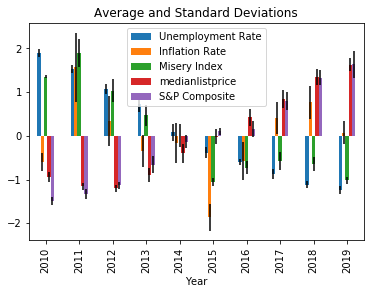

In [60]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(MasterConcatFinalsmall)
scaled_df = pd.DataFrame(scaled_df, columns=["Unemployment Rate","Inflation Rate","Misery Index","medianlistprice","S&P Composite"])
scaled_df["Year"]=MasterConcatFinal["Year"].values

scaled_df.groupby("Year").mean().plot(yerr = scaled_df.groupby("Year").std(),kind='bar', title = "Average and Standard Deviations")
